# Tools - NumPy

*NumPy is the fundamental library for scientific computing with Python. NumPy is centered around a powerful N-dimensional array object, and it also contains useful linear algebra, Fourier transform, and random number functions.*

- mainly based on numpy tutorial from Aurélien Geron in Hands on machine learning v2: https://github.com/ageron/handson-ml2
- the exercises are available at https://www.w3resource.com/python-exercises/numpy

# Summary

## 1. Creating arrays
## 2. Reshaping an array
## 3. Arithmetic operations
## 4. Broadcasting
## 5. Conditional operators
## 6. Mathematical and statistical functions
## 7. Array indexing
## 8. Iterating
## 9. Stacking arrays
## 10. Splitting arrays
## 11. Linear algebra
## 12. Vectorization
## 13. Saving and loading


# 1. Creating arrays

Let's import `numpy`. Most people import it as `np`:

In [1]:
import numpy as np

## 1.1 `np.zeros`

The `zeros` function creates an array containing any number of zeros:

In [2]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

It's just as easy to create a 2D array (ie. a matrix) by providing a tuple with the desired number of rows and columns. For example, here's a 3x4 matrix:

In [4]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## 1.2 Some vocabulary

* In NumPy, each dimension is called an **axis**.
* The number of axes is called the **rank**.
    * For example, the above 3x4 matrix is an array of rank 2 (it is 2-dimensional).
    * The first axis has length 3, the second has length 4.
* An array's list of axis lengths is called the **shape** of the array.
    * For example, the above matrix's shape is `(3, 4)`.
    * The rank is equal to the shape's length.
* The **size** of an array is the total number of elements, which is the product of all axis lengths (eg. 3*4=12)

In [5]:
a = np.zeros((3,4))
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
a.shape

(3, 4)

In [7]:
a.ndim  # equal to len(a.shape)

2

In [8]:
a.size

12

## 1.3 N-dimensional arrays
You can also create an N-dimensional array of arbitrary rank. For example, here's a 3D array (rank=3), with shape `(2,3,4)`:

In [9]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

## 1.4 `np.ones`
Many other NumPy functions create `ndarrays`.

Here's a 3x4 matrix full of ones:

In [11]:
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## 1.5 `np.full`
Creates an array of the given shape initialized with the given value. Here's a 3x4 matrix full of `π`.

In [12]:
np.full((3,4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

## 1.6 `np.empty`
An uninitialized 2x3 array (its content is not predictable, as it is whatever is in memory at that point):

In [13]:
np.empty((2,3))

array([[1.04478837e-316, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

## 1.7 np.array
Of course you can initialize an `ndarray` using a regular python array. Just call the `array` function:

In [14]:
np.array([[1,2,3,4], [10, 20, 30, 40]])

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

## 1.8 `np.arange`
You can create an `ndarray` using NumPy's `range` function, which is similar to python's built-in `range` function:

In [15]:
np.arange(1, 5)

array([1, 2, 3, 4])

It also works with floats:

In [16]:
np.arange(1.0, 5.0)

array([1., 2., 3., 4.])

Of course you can provide a step parameter:

In [17]:
np.arange(1, 5, 0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

However, when dealing with floats, the exact number of elements in the array is not always predictible. For example, consider this:

In [18]:
print(np.arange(0, 5/3, 1/3)) # depending on floating point errors, the max value is 4/3 or 5/3.
print(np.arange(0, 5/3, 0.333333333))
print(np.arange(0, 5/3, 0.333333334))


[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333334]


## 1.9 `np.linspace`
For this reason, it is generally preferable to use the `linspace` function instead of `arange` when working with floats. The `linspace` function returns an array containing a specific number of points evenly distributed between two values (note that the maximum value is *included*, contrary to `arange`):

In [19]:
print(np.linspace(0, 5/3, 6))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]


## 1.10 `np.rand` and `np.randn`
A number of functions are available in NumPy's `random` module to create `ndarray`s initialized with random values.
For example, here is a 3x4 matrix initialized with random floats between 0 and 1 (uniform distribution):

In [20]:
np.random.rand(3,4)

array([[0.25464895, 0.45920157, 0.99749842, 0.11043605],
       [0.27485166, 0.70732985, 0.75421619, 0.21605301],
       [0.67186321, 0.9650955 , 0.98986246, 0.84736146]])

Here's a 3x4 matrix containing random floats sampled from a univariate [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (Gaussian distribution) of mean 0 and variance 1:

In [21]:
np.random.randn(3,4)

array([[-0.52267118,  1.00133801, -2.37985674,  2.07777189],
       [ 0.95978767, -0.80962304, -1.61126881, -0.4983546 ],
       [-0.84352144, -1.0538715 ,  0.6132582 , -0.61654902]])

To give you a feel of what these distributions look like, let's use matplotlib (see the [matplotlib tutorial](tools_matplotlib.ipynb) for more details):

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

/home/jdumas/PycharmProjects/proj0016_tutorials/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/home/jdumas/PycharmProjects/proj0016_tutorials/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


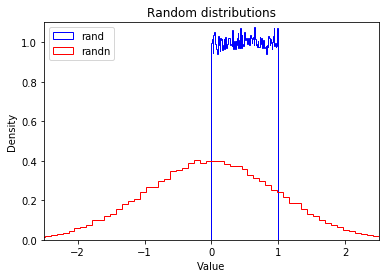

In [23]:
plt.hist(np.random.rand(100000), normed=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), normed=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

## 1.11 np.from function
You can also initialize an `ndarray` using a function:

In [24]:
def my_function(z, y, x):
    return x * y + z

np.fromfunction(my_function, (3, 2, 10))

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]],

       [[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],

       [[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]]])

NumPy first creates three `ndarrays` (one per dimension), each of shape `(2, 10)`. Each array has values equal to the coordinate along a specific axis. For example, all elements in the `z` array are equal to their z-coordinate:

    [[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
      [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
    
     [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
      [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
    
     [[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
      [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]]

So the terms x, y and z in the expression `x * y + z` above are in fact `ndarray`s (we will discuss arithmetic operations on arrays below).  The point is that the function `my_function` is only called *once*, instead of once per element. This makes initialization very efficient.

## 1.12 EXERCISES Creating array

<div class="alert alert-success">

<b>EXERCISES</b>:

 <ul>
  <li>Write a NumPy program to create a 3x3 matrix with values ranging from 2 to 10</li>
</ul>
 <ul>
  <li>Write a NumPy program to create a array with values ranging from 12 to 38</li>
</ul>
<ul>
  <li>Write a NumPy program to create a 2-dimensional array of size 2 x 3 (composed of 4-byte integer elements), also print the shape, type and data type of the array.</li>
</ul>
</div>

# 2. Reshaping an array
## 2.1 In place
Changing the shape of an `ndarray` is as simple as setting its `shape` attribute. However, the array's size must remain the same.

In [31]:
g = np.arange(24)
print(g)
print("Rank:", g.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank: 1


In [32]:
g.shape = (6, 4)
print(g)
print("Rank:", g.ndim)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Rank: 2


In [33]:
g.shape = (2, 3, 4)
print(g)
print("Rank:", g.ndim)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rank: 3


## 2.2 `reshape`
The `reshape` function returns a new `ndarray` object pointing at the *same* data. This means that modifying one array will also modify the other.

In [34]:
g2 = g.reshape(4,6)
print(g2)
print("Rank:", g2.ndim)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Rank: 2


Set item at row 1, col 2 to 999 (more about indexing below).

In [35]:
g2[1, 2] = 999
g2

array([[  0,   1,   2,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23]])

The corresponding element in `g` has been modified.

In [36]:
g

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [999,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

## 2.3 `ravel`
Finally, the `ravel` function returns a new one-dimensional `ndarray` that also points to the same data:

In [37]:
g.ravel()

array([  0,   1,   2,   3,   4,   5,   6,   7, 999,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23])

## 2.4 EXERCISES Reshaping an array

<div class="alert alert-success">

<b>EXERCISE</b>:

<ul>
  <li>Write a NumPy program to change the dimension of an array: 6 rows and 0 columns = (6,) -> 
(3, 3) = 3 rows and 3 columns</li>
</ul>

# 3. Arithmetic operations
All the usual arithmetic operators (`+`, `-`, `*`, `/`, `//`, `**`, etc.) can be used with `ndarray`s. They apply *elementwise*:

In [38]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])
print("a + b  =", a + b)
print("a - b  =", a - b)
print("a * b  =", a * b)
print("a / b  =", a / b)
print("a // b  =", a // b)
print("a % b  =", a % b)
print("a ** b =", a ** b)

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [ 2.8         5.75       10.66666667 20.5       ]
a // b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


Note that the multiplication is *not* a matrix multiplication. We will discuss matrix operations below.

The arrays must have the same shape. If they do not, NumPy will apply the *broadcasting rules*.

# 4. Broadcasting

In general, when NumPy expects arrays of the same shape but finds that this is not the case, it applies the so-called *broadcasting* rules:

## 4.1 First rule
*If the arrays do not have the same rank, then a 1 will be prepended to the smaller ranking arrays until their ranks match.*

In [39]:
h = np.arange(5).reshape(1, 1, 5)
h

array([[[0, 1, 2, 3, 4]]])

Now let's try to add a 1D array of shape `(5,)` to this 3D array of shape `(1,1,5)`. Applying the first rule of broadcasting!

In [40]:
h + [10, 20, 30, 40, 50]  # same as: h + [[[10, 20, 30, 40, 50]]]

array([[[10, 21, 32, 43, 54]]])

## 4.2 Second rule
*Arrays with a 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is repeated along that dimension.*

In [41]:
k = np.arange(6).reshape(2, 3)
k

array([[0, 1, 2],
       [3, 4, 5]])

Let's try to add a 2D array of shape `(2,1)` to this 2D `ndarray` of shape `(2, 3)`. NumPy will apply the second rule of broadcasting:

In [42]:
k + [[100], [200]]  # same as: k + [[100, 100, 100], [200, 200, 200]]

array([[100, 101, 102],
       [203, 204, 205]])

Combining rules 1 & 2, we can do this:

In [43]:
k + [100, 200, 300]  # after rule 1: [[100, 200, 300]], and after rule 2: [[100, 200, 300], [100, 200, 300]]

array([[100, 201, 302],
       [103, 204, 305]])

And also, very simply:

In [44]:
k + 1000  # same as: k + [[1000, 1000, 1000], [1000, 1000, 1000]]

array([[1000, 1001, 1002],
       [1003, 1004, 1005]])

## 4.3 Third rule
*After rules 1 & 2, the sizes of all arrays must match.*

In [45]:
try:
    k + [33, 44]
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (2,3) (2,) 


Broadcasting rules are used in many NumPy operations, not just arithmetic operations, as we will see below.
For more details about broadcasting, check out [the documentation](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html).

## 4.4 Conclusion
Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

Here are some applications of broadcasting:

In [46]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [47]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)


[[2 4 6]
 [5 7 9]]


In [48]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [49]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [50]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)


[[ 2  4  6]
 [ 8 10 12]]


## 4.5 EXERCISES Broadcasting

<div class="alert alert-success">

<b>EXERCISES</b>:

<ul>
  <li>Write a NumPy program to broadcast on different shapes of arrays where p(3,3) + q(3).</li>
</ul>
<ul>
  <li>Write a NumPy program to broadcast on different shapes of arrays where a(,3) + b(3).</li>
</ul>


# 5. Conditional operators

The conditional operators also apply elementwise:

In [54]:
m = np.array([20, -5, 30, 40])
m < [15, 16, 35, 36]

array([False,  True,  True, False])

And using broadcasting:

In [55]:
m < 25  # equivalent to m < [25, 25, 25, 25]

array([ True,  True, False, False])

This is most useful in conjunction with boolean indexing (discussed below).

In [56]:
m[m < 25]

array([20, -5])

# 6. Mathematical and statistical functions

Many mathematical and statistical functions are available for `ndarray`s.

## 6.1 `ndarray` methods
Some functions are simply `ndarray` methods, for example:

In [57]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
print(a)
print("mean =", a.mean())

[[-2.5  3.1  7. ]
 [10.  11.  12. ]]
mean = 6.766666666666667


Note that this computes the mean of all elements in the `ndarray`, regardless of its shape.

Here are a few more useful `ndarray` methods:

In [58]:
for func in (a.min, a.max, a.sum, a.prod, a.std, a.var):
    print(func.__name__, "=", func())

min = -2.5
max = 12.0
sum = 40.6
prod = -71610.0
std = 5.084835843520964
var = 25.855555555555554


These functions accept an optional argument `axis` which lets you ask for the operation to be performed on elements along the given axis. For example:

In [59]:
c=np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [60]:
c.sum(axis=0)  # sum across matrices

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [61]:
c.sum(axis=1)  # sum across rows

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

You can also sum over multiple axes:

In [62]:
c.sum(axis=(0,2))  # sum across matrices and columns

array([ 60,  92, 124])

In [63]:
0+1+2+3 + 12+13+14+15, 4+5+6+7 + 16+17+18+19, 8+9+10+11 + 20+21+22+23

(60, 92, 124)

## 6.2 Universal functions
NumPy also provides fast elementwise functions called *universal functions*, or **ufunc**. They are vectorized wrappers of simple functions. For example `square` returns a new `ndarray` which is a copy of the original `ndarray` except that each element is squared:

In [64]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
np.square(a)

array([[  6.25,   9.61,  49.  ],
       [100.  , 121.  , 144.  ]])

Here are a few more useful unary ufuncs:

In [65]:
print("Original ndarray")
print(a)
for func in (np.abs, np.sqrt, np.exp, np.log, np.sign, np.ceil, np.modf, np.isnan, np.cos):
    print("\n", func.__name__)
    print(func(a))

Original ndarray
[[-2.5  3.1  7. ]
 [10.  11.  12. ]]

 absolute
[[ 2.5  3.1  7. ]
 [10.  11.  12. ]]

 sqrt
[[       nan 1.76068169 2.64575131]
 [3.16227766 3.31662479 3.46410162]]

 exp
[[8.20849986e-02 2.21979513e+01 1.09663316e+03]
 [2.20264658e+04 5.98741417e+04 1.62754791e+05]]

 log
[[       nan 1.13140211 1.94591015]
 [2.30258509 2.39789527 2.48490665]]

 sign
[[-1.  1.  1.]
 [ 1.  1.  1.]]

 ceil
[[-2.  4.  7.]
 [10. 11. 12.]]

 modf
(array([[-0.5,  0.1,  0. ],
       [ 0. ,  0. ,  0. ]]), array([[-2.,  3.,  7.],
       [10., 11., 12.]]))

 isnan
[[False False False]
 [False False False]]

 cos
[[-0.80114362 -0.99913515  0.75390225]
 [-0.83907153  0.0044257   0.84385396]]


/home/jdumas/PycharmProjects/proj0016_tutorials/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/jdumas/PycharmProjects/proj0016_tutorials/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


## 6.3 Binary ufuncs
There are also many binary ufuncs, that apply elementwise on two `ndarray`s.  Broadcasting rules are applied if the arrays do not have the same shape:

In [66]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)  # equivalent to a + b

array([ 3,  6,  2, 11])

In [67]:
np.greater(a, b)  # equivalent to a > b

array([False, False,  True, False])

In [68]:
np.maximum(a, b)

array([2, 8, 3, 7])

## 6.4 EXERCISES Mathematical and statistical functions


<div class="alert alert-success">

<b>EXERCISES</b>:

<ul>
  <li>Write a NumPy program to compute logarithm of the sum of exponentiations of the inputs, sum of exponentiations of the inputs in base-2.</li>
</ul>
<ul>
  <li>Write a NumPy program to get true division of the element-wise array inputs.</li>
</ul>
<ul>
  <li>Write a NumPy program to multiply a matrix by another matrix of complex numbers and create a new matrix of complex numbers.</li>
</ul>
<ul>
  <li>Write a NumPy program to calculate round, floor, ceiling, truncated and round (to the given number of decimals) of the input, element-wise of a given array. </li>
</ul>



# 7. Array indexing
## 7.1 One-dimensional arrays
One-dimensional NumPy arrays can be accessed more or less like regular python arrays:

In [70]:
a = np.array([1, 5, 3, 19, 13, 7, 3])
a[3]

19

In [71]:
a[2:5]

array([ 3, 19, 13])

In [72]:
a[2:-1]

array([ 3, 19, 13,  7])

In [73]:
a[:2]

array([1, 5])

In [74]:
a[2::2]

array([ 3, 13,  3])

In [75]:
a[::-1]

array([ 3,  7, 13, 19,  3,  5,  1])

Of course, you can modify elements:

In [76]:
a[3]=999
a

array([  1,   5,   3, 999,  13,   7,   3])

You can also modify an `ndarray` slice:

In [77]:
a[2:5] = [997, 998, 999]
a

array([  1,   5, 997, 998, 999,   7,   3])

## 7.2 Differences with regular python arrays
Contrary to regular python arrays, if you assign a single value to an `ndarray` slice, it is copied across the whole slice, thanks to broadcasting rules discussed above.

In [78]:
a[2:5] = -1
a

array([ 1,  5, -1, -1, -1,  7,  3])

Also, you cannot grow or shrink `ndarray`s this way:

In [79]:
try:
    a[2:5] = [1,2,3,4,5,6]  # too long
except ValueError as e:
    print(e)

cannot copy sequence with size 6 to array axis with dimension 3


You cannot delete elements either:

In [80]:
try:
    del a[2:5]
except ValueError as e:
    print(e)

cannot delete array elements


Last but not least, `ndarray` **slices are actually *views*** on the same data buffer. This means that if you create a slice and modify it, you are actually going to modify the original `ndarray` as well!

In [81]:
a_slice = a[2:6]
a_slice[1] = 1000
a  # the original array was modified!

array([   1,    5,   -1, 1000,   -1,    7,    3])

In [82]:
a[3] = 2000
a_slice  # similarly, modifying the original array modifies the slice!

array([  -1, 2000,   -1,    7])

If you want a copy of the data, you need to use the `copy` method:

In [83]:
another_slice = a[2:6].copy()
another_slice[1] = 3000
a  # the original array is untouched

array([   1,    5,   -1, 2000,   -1,    7,    3])

In [84]:
a[3] = 4000
another_slice  # similary, modifying the original array does not affect the slice copy

array([  -1, 3000,   -1,    7])

## 7.3 Multi-dimensional arrays
Multi-dimensional arrays can be accessed in a similar way by providing an index or slice for each axis, separated by commas:

In [85]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [86]:
b[1, 2]  # row 1, col 2

14

In [87]:
b[1, :]  # row 1, all columns

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [88]:
b[:, 1]  # all rows, column 1

array([ 1, 13, 25, 37])

**Caution**: note the subtle difference between these two expressions: 

In [89]:
b[1, :]

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [90]:
b[1:2, :]

array([[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

The first expression returns row 1 as a 1D array of shape `(12,)`, while the second returns that same row as a 2D array of shape `(1, 12)`.

## 7.4 Higher dimensions
Everything works just as well with higher dimensional arrays, but it's useful to look at a few examples:

In [94]:
c = b.reshape(4,2,6)
c

array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]],

       [[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]],

       [[24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]],

       [[36, 37, 38, 39, 40, 41],
        [42, 43, 44, 45, 46, 47]]])

In [95]:
c[2, 1, 4]  # matrix 2, row 1, col 4

34

In [96]:
c[2, :, 3]  # matrix 2, all rows, col 3

array([27, 33])

If you omit coordinates for some axes, then all elements in these axes are returned:

In [97]:
c[2, 1]  # Return matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

## 7.5 Boolean indexing
You can also provide an `ndarray` of boolean values on one axis to specify the indices that you want to access.

In [102]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [103]:
rows_on = np.array([True, False, True, False])
b[rows_on, :]  # Rows 0 and 2, all columns. Equivalent to b[(0, 2), :]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [104]:
cols_on = np.array([False, True, False] * 4)
b[:, cols_on]  # All rows, columns 1, 4, 7 and 10

array([[ 1,  4,  7, 10],
       [13, 16, 19, 22],
       [25, 28, 31, 34],
       [37, 40, 43, 46]])

## 7.6 `np.ix_`
You cannot use boolean indexing this way on multiple axes, but you can work around this by using the `ix_` function:

In [105]:
b[np.ix_(rows_on, cols_on)]

array([[ 1,  4,  7, 10],
       [25, 28, 31, 34]])

In [106]:
np.ix_(rows_on, cols_on)

(array([[0],
        [2]]), array([[ 1,  4,  7, 10]]))

If you use a boolean array that has the same shape as the `ndarray`, then you get in return a 1D array containing all the values that have `True` at their coordinate. This is generally used along with conditional operators:

In [107]:
b[b % 3 == 1]

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46])

## 7.7 EXERCISES Array indexing

<div class="alert alert-success">

<b>EXERCISES</b>:

<ul>
  <li>Write a NumPy program to create a structured array from given student name, height, class and their data types. Now sort the array on height.</li>
</ul>
<ul>
  <li>Write a NumPy program to sort the student id with increasing height of the students from given students id and height. Print the integer indices that describes the sort order by multiple columns and the sorted data.</li>
</ul>


# 8. Iterating
Iterating over `ndarray`s is very similar to iterating over regular python arrays. Note that iterating over multidimensional arrays is done with respect to the first axis.

In [108]:
c = np.arange(24).reshape(2, 3, 4)  # A 3D array (composed of two 3x4 matrices)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [109]:
for m in c:
    print("Item:")
    print(m)

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [110]:
for i in range(len(c)):  # Note that len(c) == c.shape[0]
    print("Item:")
    print(c[i])

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


If you want to iterate on *all* elements in the `ndarray`, simply iterate over the `flat` attribute:

In [111]:
for i in c.flat:
    print("Item:", i)

Item: 0
Item: 1
Item: 2
Item: 3
Item: 4
Item: 5
Item: 6
Item: 7
Item: 8
Item: 9
Item: 10
Item: 11
Item: 12
Item: 13
Item: 14
Item: 15
Item: 16
Item: 17
Item: 18
Item: 19
Item: 20
Item: 21
Item: 22
Item: 23


# 9. Stacking arrays
It is often useful to stack together different arrays. NumPy offers several functions to do just that. Let's start by creating a few arrays.

In [112]:
q1 = np.full((3,4), 1.0)
q1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [113]:
q2 = np.full((4,4), 2.0)
q2

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [114]:
q3 = np.full((3,4), 3.0)
q3

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

## 9.1 `vstack`
Now let's stack them vertically using `vstack`:

In [115]:
q4 = np.vstack((q1, q2, q3))
q4

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [116]:
q4.shape

(10, 4)

This was possible because q1, q2 and q3 all have the same shape (except for the vertical axis, but that's ok since we are stacking on that axis).

## 9.2 `hstack`
We can also stack arrays horizontally using `hstack`:

In [117]:
q5 = np.hstack((q1, q3))
q5

array([[1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.]])

In [118]:
q5.shape

(3, 8)

This is possible because q1 and q3 both have 3 rows. But since q2 has 4 rows, it cannot be stacked horizontally with q1 and q3:

In [119]:
try:
    q5 = np.hstack((q1, q2, q3))
except ValueError as e:
    print(e)

all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 4


## `concatenate`
The `concatenate` function stacks arrays along any given existing axis.

In [120]:
q7 = np.concatenate((q1, q2, q3), axis=0)  # Equivalent to vstack
q7

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [121]:
q7.shape

(10, 4)

As you might guess, `hstack` is equivalent to calling `concatenate` with `axis=1`.

## 9.3 `stack`
The `stack` function stacks arrays along a new axis. All arrays have to have the same shape.

In [122]:
q8 = np.stack((q1, q3))
q8

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]])

In [123]:
q8.shape

(2, 3, 4)

# 10. Splitting arrays
Splitting is the opposite of stacking. For example, let's use the `vsplit` function to split a matrix vertically.

First let's create a 6x4 matrix:

In [124]:
r = np.arange(24).reshape(6,4)
r

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

Now let's split it in three equal parts, vertically:

In [125]:
r1, r2, r3 = np.vsplit(r, 3)
r1

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [126]:
r2

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [127]:
r3

array([[16, 17, 18, 19],
       [20, 21, 22, 23]])

There is also a `split` function which splits an array along any given axis. Calling `vsplit` is equivalent to calling `split` with `axis=0`. There is also an `hsplit` function, equivalent to calling `split` with `axis=1`:

In [128]:
r4, r5 = np.hsplit(r, 2)
r4

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13],
       [16, 17],
       [20, 21]])

In [129]:
r5

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15],
       [18, 19],
       [22, 23]])

## EXERCISES Splitting arrays

<div class="alert alert-success">

<b>EXERCISES</b>:

<ul>
  <li>Write a NumPy program to split an given array into multiple sub-arrays vertically (row-wise). </li>
</ul>
<ul>
  <li>Write a NumPy program to split array into multiple sub-arrays along the 3rd axis.</li>
</ul>

# 11. Linear algebra
NumPy 2D arrays can be used to represent matrices efficiently in python. We will just quickly go through some of the main matrix operations available. For more details about Linear Algebra, vectors and matrics, go through the [Linear Algebra tutorial](math_linear_algebra.ipynb).

## 11.1 Matrix transpose
The `T` attribute is equivalent to calling `transpose()` when the rank is ≥2:

In [137]:
m1 = np.arange(10).reshape(2,5)
m1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [138]:
m1.T

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

The `T` attribute has no effect on rank 0 (empty) or rank 1 arrays:

In [139]:
m2 = np.arange(5)
m2

array([0, 1, 2, 3, 4])

In [140]:
m2.T

array([0, 1, 2, 3, 4])

We can get the desired transposition by first reshaping the 1D array to a single-row matrix (2D):

In [141]:
m2r = m2.reshape(1,5)
m2r

array([[0, 1, 2, 3, 4]])

In [142]:
m2r.T

array([[0],
       [1],
       [2],
       [3],
       [4]])

## 11.2 Matrix dot product
Let's create two matrices and execute a matrix [dot product](https://en.wikipedia.org/wiki/Dot_product) using the `dot` method.

In [143]:
n1 = np.arange(10).reshape(2, 5)
n1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [144]:
n2 = np.arange(15).reshape(5,3)
n2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [145]:
n1.dot(n2)

array([[ 90, 100, 110],
       [240, 275, 310]])

**Caution**: as mentionned previously, `n1*n2` is *not* a dot product, it is an elementwise product.

## 11.3 Matrix inverse and pseudo-inverse
Many of the linear algebra functions are available in the `numpy.linalg` module, in particular the `inv` function to compute a square matrix's inverse:

In [146]:
import numpy.linalg as linalg

m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])
m3

array([[ 1,  2,  3],
       [ 5,  7, 11],
       [21, 29, 31]])

In [147]:
linalg.inv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

You can also compute the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) using `pinv`:

In [148]:
linalg.pinv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

## 11.4 Identity matrix
The product of a matrix by its inverse returns the identiy matrix (with small floating point errors):

In [149]:
m3.dot(linalg.inv(m3))

array([[ 1.00000000e+00, -1.66533454e-16,  0.00000000e+00],
       [ 6.31439345e-16,  1.00000000e+00, -1.38777878e-16],
       [ 5.21110932e-15, -2.38697950e-15,  1.00000000e+00]])

You can create an identity matrix of size NxN by calling `eye`:

In [150]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 11.5 QR decomposition
The `qr` function computes the [QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition) of a matrix:

In [151]:
q, r = linalg.qr(m3)
q

array([[-0.04627448,  0.98786672,  0.14824986],
       [-0.23137241,  0.13377362, -0.96362411],
       [-0.97176411, -0.07889213,  0.22237479]])

In [152]:
r

array([[-21.61018278, -29.89331494, -32.80860727],
       [  0.        ,   0.62427688,   1.9894538 ],
       [  0.        ,   0.        ,  -3.26149699]])

In [153]:
q.dot(r)  # q.r equals m3

array([[ 1.,  2.,  3.],
       [ 5.,  7., 11.],
       [21., 29., 31.]])

## 11.6 Determinant
The `det` function computes the [matrix determinant](https://en.wikipedia.org/wiki/Determinant):

In [154]:
linalg.det(m3)  # Computes the matrix determinant

43.99999999999997

## 11.7 Eigenvalues and eigenvectors
The `eig` function computes the [eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of a square matrix:

In [155]:
eigenvalues, eigenvectors = linalg.eig(m3)
eigenvalues # λ

array([42.26600592, -0.35798416, -2.90802176])

In [156]:
eigenvectors # v

array([[-0.08381182, -0.76283526, -0.18913107],
       [-0.3075286 ,  0.64133975, -0.6853186 ],
       [-0.94784057, -0.08225377,  0.70325518]])

In [157]:
m3.dot(eigenvectors) - eigenvalues * eigenvectors  # m3.v - λ*v = 0

array([[ 6.66133815e-15,  1.66533454e-15, -3.10862447e-15],
       [ 7.10542736e-15,  5.16253706e-15, -5.32907052e-15],
       [ 3.55271368e-14,  4.94743135e-15, -9.76996262e-15]])

## 11.8 Singular Value Decomposition
The `svd` function takes a matrix and returns its [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition):

In [158]:
m4 = np.array([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0], [0,2,0,0,0]])
m4

array([[1, 0, 0, 0, 2],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0]])

In [159]:
U, S_diag, V = linalg.svd(m4)
U

array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.]])

In [160]:
S_diag

array([3.        , 2.23606798, 2.        , 0.        ])

The `svd` function just returns the values in the diagonal of Σ, but we want the full Σ matrix, so let's create it:

In [161]:
S = np.zeros((4, 5))
S[np.diag_indices(4)] = S_diag
S  # Σ

array([[3.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.23606798, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [162]:
V

array([[-0.        ,  0.        ,  1.        , -0.        ,  0.        ],
       [ 0.4472136 ,  0.        ,  0.        ,  0.        ,  0.89442719],
       [-0.        ,  1.        ,  0.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.89442719,  0.        ,  0.        ,  0.        ,  0.4472136 ]])

In [163]:
U.dot(S).dot(V) # U.Σ.V == m4

array([[1., 0., 0., 0., 2.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.]])

## 11.9 Diagonal and trace

In [164]:
np.diag(m3)  # the values in the diagonal of m3 (top left to bottom right)

array([ 1,  7, 31])

In [165]:
np.trace(m3)  # equivalent to np.diag(m3).sum()

39

## 11.10 Solving a system of linear scalar equations

The `solve` function solves a system of linear scalar equations, such as:

* $2x + 6y = 6$
* $5x + 3y = -9$

In [166]:
coeffs  = np.array([[2, 6], [5, 3]])
depvars = np.array([6, -9])
solution = linalg.solve(coeffs, depvars)
solution

array([-3.,  2.])

Let's check the solution:

In [167]:
coeffs.dot(solution), depvars  # yep, it's the same

(array([ 6., -9.]), array([ 6, -9]))

Looks good! Another way to check the solution:

In [168]:
np.allclose(coeffs.dot(solution), depvars)

True

## EXERCISES Linear Algebra

<div class="alert alert-success">

<b>EXERCISES</b>:

<ul>
  <li>Write a NumPy program to compute the multiplication of two given matrixes. </li>
</ul>
<ul>
  <li>Write a NumPy program to compute the outer product of two given vectors.</li>
</ul>
<ul>
  <li>Write a NumPy program to compute the eigenvalues and right eigenvectors of a given square array.</li>
</ul>
<ul>
  <li>Write a NumPy program to calculate the QR decomposition of a given matrix.</li>
</ul>
<ul>
  <li>Write a NumPy program to get the qr factorization of a given array.</li>
</ul>


# 12. Vectorization
Instead of executing operations on individual array items, one at a time, your code is much more efficient if you try to stick to array operations. This is called *vectorization*. This way, you can benefit from NumPy's many optimizations.

For example, let's say we want to generate a 768x1024 array based on the formula $sin(xy/40.5)$. A **bad** option would be to do the math in python using nested loops:

In [169]:
import math
data = np.empty((768, 1024))
for y in range(768):
    for x in range(1024):
        data[y, x] = math.sin(x*y/40.5)  # BAD! Very inefficient.

Sure, this works, but it's terribly inefficient since the loops are taking place in pure python. Let's vectorize this algorithm. First, we will use NumPy's `meshgrid` function which generates coordinate matrices from coordinate vectors.

In [170]:
x_coords = np.arange(0, 1024)  # [0, 1, 2, ..., 1023]
y_coords = np.arange(0, 768)   # [0, 1, 2, ..., 767]
X, Y = np.meshgrid(x_coords, y_coords)
X

array([[   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       ...,
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023]])

In [171]:
Y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [765, 765, 765, ..., 765, 765, 765],
       [766, 766, 766, ..., 766, 766, 766],
       [767, 767, 767, ..., 767, 767, 767]])

As you can see, both `X` and `Y` are 768x1024 arrays, and all values in `X` correspond to the horizontal coordinate, while all values in `Y` correspond to the the vertical coordinate.

Now we can simply compute the result using array operations:

In [172]:
data = np.sin(X*Y/40.5)

Now we can plot this data using matplotlib's `imshow` function (see the [matplotlib tutorial](tools_matplotlib.ipynb)).

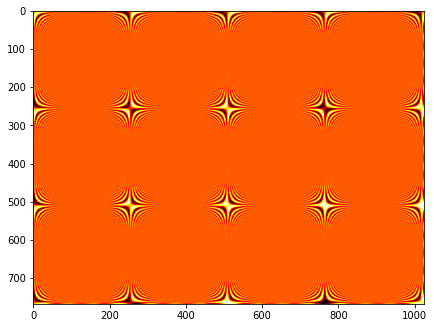

In [173]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig = plt.figure(1, figsize=(7, 6))
plt.imshow(data, cmap=cm.hot, interpolation="bicubic")
plt.show()

# 13. Saving and loading
NumPy makes it easy to save and load `ndarray`s in binary or text format.

## 13.1 Binary `.npy` format
Let's create a random array and save it.

In [174]:
a = np.random.rand(2,3)
a

array([[0.89126758, 0.83192161, 0.86178874],
       [0.42590038, 0.79707136, 0.31281229]])

In [175]:
np.save("my_array", a)

Done! Since the file name contains no file extension was provided, NumPy automatically added `.npy`. Let's take a peek at the file content:

In [176]:
with open("my_array.npy", "rb") as f:
    content = f.read()

content

b"\x93NUMPY\x01\x00v\x00{'descr': '<f8', 'fortran_order': False, 'shape': (2, 3), }                                                          \n%\xfd^\x98C\x85\xec?e\x95\xf4\x13\x1a\x9f\xea?\xdd\xaaW\xfd\xc5\x93\xeb?\xa84\xff\xaa\xf3A\xdb?\xee\x9a\xea\xcc\x9b\x81\xe9?\x1a\x7f;\xd6\x1d\x05\xd4?"

To load this file into a NumPy array, simply call `load`:

In [177]:
a_loaded = np.load("my_array.npy")
a_loaded

array([[0.89126758, 0.83192161, 0.86178874],
       [0.42590038, 0.79707136, 0.31281229]])

## 13.2 Text format
Let's try saving the array in text format:

In [178]:
np.savetxt("my_array.csv", a)

Now let's look at the file content:

In [179]:
with open("my_array.csv", "rt") as f:
    print(f.read())

8.912675834652971085e-01 8.319216146234508225e-01 8.617887447447533100e-01
4.259003801242422504e-01 7.970713617586093758e-01 3.128122894395218845e-01



This is a CSV file with tabs as delimiters. You can set a different delimiter:

In [180]:
np.savetxt("my_array.csv", a, delimiter=",")

To load this file, just use `loadtxt`:

In [181]:
a_loaded = np.loadtxt("my_array.csv", delimiter=",")
a_loaded

array([[0.89126758, 0.83192161, 0.86178874],
       [0.42590038, 0.79707136, 0.31281229]])

## 13.3 Zipped `.npz` format
It is also possible to save multiple arrays in one zipped file:

In [182]:
b = np.arange(24, dtype=np.uint8).reshape(2, 3, 4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=uint8)

In [183]:
np.savez("my_arrays", my_a=a, my_b=b)

Again, let's take a peek at the file content. Note that the `.npz` file extension was automatically added.

In [184]:
with open("my_arrays.npz", "rb") as f:
    content = f.read()

repr(content)[:180] + "[...]"

'b"PK\\x03\\x04\\x14\\x00\\x00\\x00\\x00\\x00\\x00\\x00!\\x00\\x8d\\xf0\\xd1\\x13\\xb0\\x00\\x00\\x00\\xb0\\x00\\x00\\x00\\x08\\x00\\x14\\x00my_a.npy\\x01\\x00\\x10\\x00\\xb0\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xb0\\x00\\x0[...]'

You then load this file like so:

In [185]:
my_arrays = np.load("my_arrays.npz")
my_arrays

This is a dict-like object which loads the arrays lazily:

In [186]:
my_arrays.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb4b164f278>)

In [187]:
my_arrays["my_a"]

array([[0.89126758, 0.83192161, 0.86178874],
       [0.42590038, 0.79707136, 0.31281229]])

## Further reading

Now you know all the fundamentals of NumPy, but there are many more options available. 
The best way to learn more is to experiment with NumPy, and go through the excellent [reference documentation](http://docs.scipy.org/doc/numpy/reference/index.html) to find more functions and features you may be interested in.

* Tutorials (many good online tutorials!)

  * https://docs.scipy.org/doc/numpy/user/quickstart.html
  * https://www.machinelearningplus.com/python/numpy-tutorial-part1-array-python-examples/
  * https://www.guru99.com/numpy-tutorial.html